<a href="https://colab.research.google.com/github/hellojohnkim/mmai823/blob/main/Assignment%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# New Section

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
%matplotlib inline


# Data Prep - S&P500 Wikipedia, yfinance (PE, Market Cap)

In [3]:
## scraping wikipedia table to get list of tickers of companies aka constituents

# There are 2 tables on the Wikipedia page, we want the first table
# second table shows the evolution of the changes

components = \
pd.read_html('https://en.wikipedia.org/wiki/List_of_S&P_500_companies')

first_table = components[0]
second_table = components[1]
sp_df = first_table
sp_df.Symbol
sp500_tickers = sp_df.Symbol

In [4]:
#make sure we have data = 503 symbols
sp500_tickers.info()

<class 'pandas.core.series.Series'>
RangeIndex: 503 entries, 0 to 502
Series name: Symbol
Non-Null Count  Dtype 
--------------  ----- 
503 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [5]:
#other data we got from wikipedia
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [6]:
##yahoo finance to call market cap of a stock
yf.Ticker('MSFT').info['marketCap']

3087347744768

In [51]:
#get various yfinance data for tickers in S&P500 we'll be using in this assignment
#PE ratios - trailing and forward
#market cap

SP500_data=[]


for ticker in sp500_tickers:
    try:
    #if symbol not in ['INFO', 'AES']:
        ticker=ticker.replace('.', '-')  #For dual shares, eg, BRK.B, we have to change it to BRK-B
        ticker_yahoo = yf.Ticker(ticker)
        print(ticker,round(ticker_yahoo.info['trailingPE'],2),round(ticker_yahoo.info['forwardPE'],2),round(ticker_yahoo.info['marketCap']))
        SP500_data.append(
            {
                "Ticker":ticker,
                "trailingPE":round(ticker_yahoo.info['trailingPE'],2),
                "forwardPE": round(ticker_yahoo.info['forwardPE'],2),
                "marketCap":round(ticker_yahoo.info['marketCap']),
            }
        )
    except:
        pass

SP500_data=pd.DataFrame(SP500_data)

AOS 22.75 19.39 12355549184
ABT 36.39 23.21 205827063808
ABBV 65.78 14.65 316039168000
ACN 35.34 28.12 238877671424
ADBE 48.34 28.11 258060353536
AMD 382.34 37.18 327423688704
AES 45.5 7.47 10988139520
AFL 10.34 11.62 46408753152
A 33.19 22.72 40750415872
APD 22.58 17.59 52463034368
ABNB 22.06 32.73 101879799808
AKAM 31.32 15.04 16646239232
ALB 10.68 14.57 16765149184
ARE 234.47 36.34 21740290048
ALGN 51.55 28.57 22977497088
ALLE 20.72 16.77 11101897728
LNT 17.17 14.51 12223652864
GOOGL 23.64 17.54 1710396407808
GOOG 23.81 17.68 1710397063168
MO 8.94 7.8 72054972416
AMZN 61.46 33.56 1851242446848
AMCR 20.66 12.45 13138141184
AEE 16.28 14.47 18992515072
AAL 12.94 4.77 10253494272
AEP 19.49 14.26 44720459776
AXP 19.61 14.88 159005294592
AIG 14.63 9.0 49600684032
AMT 63.25 32.08 94091173888
AWK 24.47 21.18 23308279808
AMP 17.33 11.13 41178480640
AME 31.87 24.19 41739423744
AMGN 22.46 13.27 150234169344
APH 35.63 30.19 66469928960
ADI 35.09 26.15 97277313024
ANSS 59.17 31.48 29552984064
AO

In [52]:
SP500_data

,Ticker,trailingPE,forwardPE,marketCap
0,AOS,22.75,19.39,12355549184
1,ABT,36.39,23.21,205827063808
2,ABBV,65.78,14.65,316039168000
3,ACN,35.34,28.12,238877671424
4,ADBE,48.34,28.11,258060353536
...,...,...,...,...
465,YUM,24.58,21.17,38661193728
466,ZBRA,50.73,20.57,14882109440
467,ZBH,25.36,14.29,25432467456
468,ZION,8.91,8.36,5743969792


In [57]:
SP500_data = SP500_data.join(sp_df.set_index('Symbol'), on='Ticker')

# Question 2

2. List the S&P500 companies that have the top 5 highest trailing PE, and the top 5 with highest forward PE.





Companies that have the top 5 highest trailing PE

In [62]:
# top 5 companies with highest trailing PE
SP500_data.sort_values('trailingPE', ascending=False).head(5)

,Ticker,trailingPE,forwardPE,marketCap,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
297,MRK,906.86,13.01,321543962624,Merck & Co.,Health Care,Pharmaceuticals,"Kenilworth, New Jersey",1957-03-04,310158.0,1891
5,AMD,382.34,37.18,327423688704,Advanced Micro Devices,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,2488.0,1969
442,VTRS,251.80,4.46,15103845376,Viatris,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044.0,1961
107,CLX,245.29,23.40,18874040320,Clorox,Consumer Staples,Household Products,"Oakland, California",1969-03-31,21076.0,1913
13,ARE,234.47,36.34,21740290048,Alexandria Real Estate Equities,Real Estate,Office REITs,"Pasadena, California",2017-03-20,1035443.0,1994


Companies that have the top 5 highest forward PE

In [63]:
# top 5 companies with highest forward PE
SP500_data.sort_values('forwardPE', ascending=False).head(5)

,Ticker,trailingPE,forwardPE,marketCap,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
139,DLR,50.20,128.72,48002699264,Digital Realty,Real Estate,Data Center REITs,"Austin, Texas",2016-05-18,1297996.0,2004
428,UDR,26.82,74.88,12779401216,"UDR, Inc.",Real Estate,Multi-Family Residential REITs,"Highlands Ranch, Colorado",2016-03-07,74208.0,1972
167,EQIX,87.69,68.48,85209415680,Equinix,Real Estate,Data Center REITs,"Redwood City, California",2015-03-20,1101239.0,1998
124,CSGP,95.95,68.43,36050259968,CoStar Group,Real Estate,Real Estate Services,"Washington, D.C.",2022-09-19,1057352.0,1987
455,WELL,134.38,56.19,52746371072,Welltower,Real Estate,Health Care REITs,"Toledo, Ohio",2009-01-30,766704.0,1970


5 Companies that have the lowest trailing PE

In [64]:
# companies with lowest trailing PE
SP500_data.sort_values('trailingPE', ascending=True).head(5)

,Ticker,trailingPE,forwardPE,marketCap,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
36,APA,3.29,6.13,9170226176,APA Corporation,Energy,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,1841666.0,1954
191,FMC,5.07,11.42,7149938688,FMC Corporation,Materials,Fertilizers & Agricultural Chemicals,"Philadelphia, Pennsylvania",2009-08-19,37785.0,1883
207,GM,5.60,4.49,47320084480,General Motors,Consumer Discretionary,Automobile Manufacturers,"Detroit, Michigan",2013-06-06,1467858.0,1908
431,UAL,5.68,3.88,14708193280,United Airlines Holdings,Industrials,Passenger Airlines,"Chicago, Illinois",2015-09-03,100517.0,1967
436,VLO,5.75,10.87,47638020096,Valero Energy,Energy,Oil & Gas Refining & Marketing,"San Antonio, Texas",2002-12-20,1035002.0,1980


Companies that have the top 5 lowest forward PE

In [65]:
# companies with lowest forward PE
SP500_data.sort_values('forwardPE', ascending=True).head(5)

,Ticker,trailingPE,forwardPE,marketCap,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
431,UAL,5.68,3.88,14708193280,United Airlines Holdings,Industrials,Passenger Airlines,"Chicago, Illinois",2015-09-03,100517.0,1967
442,VTRS,251.80,4.46,15103845376,Viatris,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044.0,1961
207,GM,5.60,4.49,47320084480,General Motors,Consumer Discretionary,Automobile Manufacturers,"Detroit, Michigan",2013-06-06,1467858.0,1908
23,AAL,12.94,4.77,10253494272,American Airlines Group,Industrials,Passenger Airlines,"Fort Worth, Texas",2015-03-23,6201.0,1934
172,EG,6.15,5.39,16050977792,Everest Re,Financials,Reinsurance,"Hamilton, Bermuda",2017-06-19,1095073.0,1973


# Question 3

3. Suppose that you want to establish a portfolio among only those S&P 500 companies with the following features:
    a. Market Cap between the 40-60% quantile
    b. Foward PE among the 30-50% quantile

In [67]:
# Calculate quantile bounds for market cap and Forward PE
mcap_lower_bound = SP500_data['marketCap'].quantile(0.4)
mcap_upper_bound = SP500_data['marketCap'].quantile(0.6)
pe_lower_bound = SP500_data['forwardPE'].quantile(0.3)
pe_upper_bound = SP500_data['forwardPE'].quantile(0.5)

# Filter the combined DataFrame using the quantile bounds
filtered_companies = SP500_data[
    (SP500_data['marketCap'] > mcap_lower_bound) & (SP500_data['marketCap'] < mcap_upper_bound) &
    (SP500_data['forwardPE'] > pe_lower_bound) & (SP500_data['forwardPE'] < pe_upper_bound)
]

# Display the filtered DataFrame
filtered_companies

,Ticker,trailingPE,forwardPE,marketCap,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
24,AEP,19.49,14.26,44720459776,American Electric Power,Utilities,Electric Utilities,"Columbus, Ohio",1957-03-04,4904.0,1906
81,CAH,44.99,14.15,27575324672,Cardinal Health,Health Care,Health Care Distributors,"Dublin, Ohio",1997-05-27,721371.0,1971
86,CBRE,29.52,16.60,28423614464,CBRE Group,Real Estate,Real Estate Services,"Dallas, Texas",2006-11-10,1138118.0,1906
111,CTSH,18.67,15.75,39135358976,Cognizant,Information Technology,IT Consulting & Other Services,"Teaneck, New Jersey",2006-11-17,1058290.0,1994
117,ED,12.07,15.54,30062827520,Consolidated Edison,Utilities,Multi-Utilities,"New York City, New York",1957-03-04,1047862.0,1823
122,GLW,47.72,15.02,27695230976,Corning Inc.,Information Technology,Electronic Components,"Corning, New York",1995-02-27,24741.0,1851
123,CTVA,41.28,15.64,37657673728,Corteva,Materials,Fertilizers & Agricultural Chemicals,"Indianapolis, Indiana",2019-06-03,1755672.0,2019
150,DD,63.82,16.72,29047072768,DuPont,Materials,Specialty Chemicals,"Wilmington, Delaware",2019-04-02,1666700.0,2017 (1802)
174,EXC,15.17,13.55,35473641472,Exelon,Utilities,Electric Utilities,"Chicago, Illinois",1957-03-04,1109357.0,2000
206,GIS,15.56,13.69,36310884352,General Mills,Consumer Staples,Packaged Foods & Meats,"Golden Valley, Minnesota",1957-03-04,40704.0,1856


In [68]:
# export the list as csv file
filtered_companies.to_excel('filtered_companies.xlsx', index=False)

# Question 4

4. Based on the returns from the stocks in the S&P500 Index

4.1 Group the stocks by sectors 'GICS Sector', compute and the average rate of returns for the stocks in the same sector.

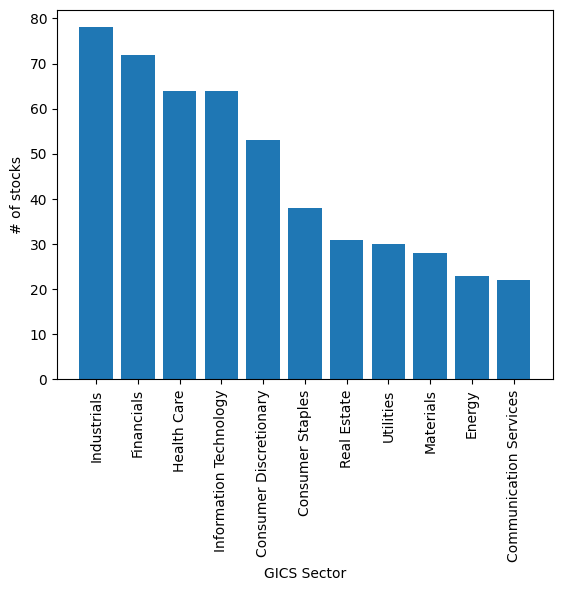

<Figure size 800x600 with 0 Axes>

In [29]:
##Quick EDA on the GICS sector distribution

sectors_counts = sp_df["GICS Sector"].value_counts()
plt.bar(sectors_counts.index, sectors_counts.values)
plt.xticks(rotation=90)
plt.xlabel("GICS Sector")
plt.ylabel("# of stocks")
plt.figure(figsize=(8,6))
plt.show()

In [30]:
#creating lists of tickers/symbols for each sector
industrials = sp_df.where(sp_df['GICS Sector'] == 'Industrials')['Symbol'].dropna().values.tolist()
financials = sp_df.where(sp_df['GICS Sector'] == 'Financials')['Symbol'].dropna().values.tolist()
healthcare = sp_df.where(sp_df['GICS Sector'] == 'Health Care')['Symbol'].dropna().values.tolist()
infotech = sp_df.where(sp_df['GICS Sector'] == 'Information Technology')['Symbol'].dropna().values.tolist()
consdisc = sp_df.where(sp_df['GICS Sector'] == 'Consumer Discretionary')['Symbol'].dropna().values.tolist()
consstap = sp_df.where(sp_df['GICS Sector'] == 'Consumer Staples')['Symbol'].dropna().values.tolist()
realestate = sp_df.where(sp_df['GICS Sector'] == 'Real Estate')['Symbol'].dropna().values.tolist()
utilities = sp_df.where(sp_df['GICS Sector'] == 'Utilities')['Symbol'].dropna().values.tolist()
materials = sp_df.where(sp_df['GICS Sector'] == 'Materials')['Symbol'].dropna().values.tolist()
energy = sp_df.where(sp_df['GICS Sector'] == 'Energy')['Symbol'].dropna().values.tolist()
comms = sp_df.where(sp_df['GICS Sector'] == 'Communication Services')['Symbol'].dropna().values.tolist()

In [31]:
# Function to calculate average annual return for a list of tickers
def calculate_average_annual_return(sp500_tickers):
    start_date = "2000-01-01"  # 23 year period since 2000
    end_date = "2023-12-29"
    annual_returns = []

    for ticker in sp500_tickers:
        # Fetch historical data
        data = yf.download(ticker, start=start_date, end=end_date)

        # Calculate annual return
        if not data.empty:
            total_return = data['Adj Close'][-1] / data['Adj Close'][0] - 1
            annual_return = (1 + total_return) ** (1/23) - 1  # Compound annual growth rate (CAGR) for 23 year period
            annual_returns.append(annual_return)

    # Return the average annual return for the sector
    return np.mean(annual_returns) if annual_returns else None

# Calculate average annual return for each sector
industrials_avg_return = calculate_average_annual_return(industrials)
financials_avg_return = calculate_average_annual_return(financials)
healthcare_avg_return = calculate_average_annual_return(healthcare)
infotech_avg_return = calculate_average_annual_return(infotech)
consdisc_avg_return = calculate_average_annual_return(consdisc)
consstap_avg_return = calculate_average_annual_return(consstap)
realestate_avg_return = calculate_average_annual_return(realestate)
utilities_avg_return = calculate_average_annual_return(utilities)
materials_avg_return = calculate_average_annual_return(materials)
energy_avg_return = calculate_average_annual_return(energy)
comms_avg_return = calculate_average_annual_return(comms)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [32]:

# Print the results
print("Industrials Average Return:", industrials_avg_return)
print("Financials Average Return:", financials_avg_return)
print("Health Care Average Return:", healthcare_avg_return)
print("Information Technology Average Return:", infotech_avg_return)
print("Consumer Discretionary Average Return:", consdisc_avg_return)
print("Consuer Staple Average Return:", consstap_avg_return)
print("Real Estate Average Return:", realestate_avg_return)
print("Utilities Average Return:", utilities_avg_return)
print("Materials Average Return:", materials_avg_return)
print("Energy Average Return:", energy_avg_return)
print("Communication Servicves Average Return:", comms_avg_return)

Industrials Average Return: 0.11684917045661812
Financials Average Return: 0.0949239927969876
Health Care Average Return: 0.12415218055940784
Information Technology Average Return: 0.11098745229712632
Consumer Discretionary Average Return: 0.12284275537323791
Consuer Staple Average Return: 0.09282747497334395
Real Estate Average Return: 0.11288062865984326
Utilities Average Return: 0.09127185359435236
Materials Average Return: 0.09851837163502931
Energy Average Return: 0.09965521706970713
Communication Servicves Average Return: 0.07368550276037084


Based on the average returns from 2000 to 2023, discuss the performance of the stocks in different sectors.


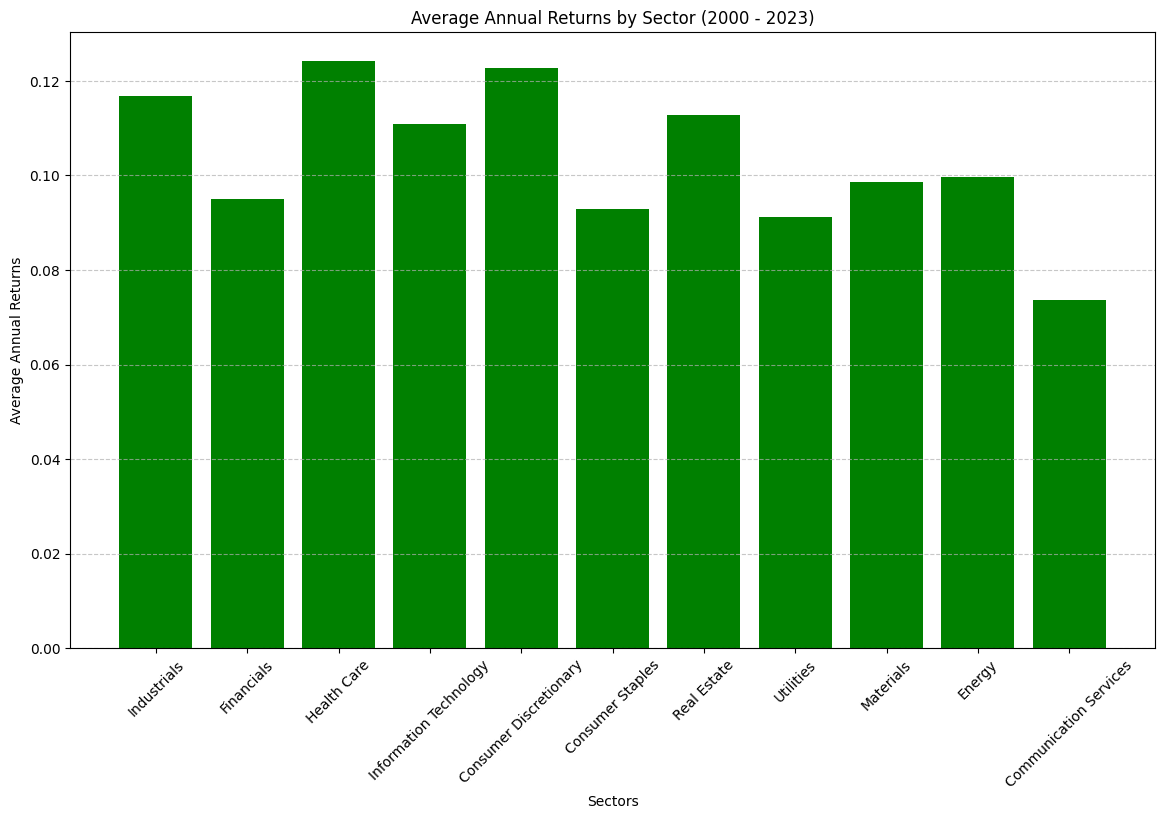

In [37]:
import matplotlib.pyplot as plt

# Sector names
sectors = ['Industrials', 'Financials', 'Health Care', 'Information Technology', 'Consumer Discretionary',
           'Consumer Staples', 'Real Estate', 'Utilities', 'Materials', 'Energy', 'Communication Services']

# Average annual returns for each sector
average_returns = [industrials_avg_return, financials_avg_return, healthcare_avg_return, infotech_avg_return,
                   consdisc_avg_return, consstap_avg_return, realestate_avg_return, utilities_avg_return,
                   materials_avg_return, energy_avg_return, comms_avg_return]

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(sectors, average_returns, color='green')
plt.xlabel('Sectors')
plt.ylabel('Average Annual Returns')
plt.title('Average Annual Returns by Sector (2000 - 2023)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
